## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN,LSTM,GRU, Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
from keras.utils import timeseries_dataset_from_array

In [ ]:
# drive.mount('/content/drive')
# %cd '/content/drive/My Drive/T5/Week5/Day_2'

### Random seed

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(23)

# Load dataset

In [ ]:
df = pd.read_csv('/content/telraam (1).csv',parse_dates=['Date'],index_col=['Date'])
df.head()

,Bike,Car,Lorry,speed_00,speed_10,speed_20,speed_30,speed_40,speed_50,speed_60
Date,,,,,,,,,,
2020-06-11 16:00:00+00:00,0.0,24.0,0.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2020-06-16 10:00:00+00:00,63.0,682.0,0.0,210.0,242.0,158.0,53.0,11.0,11.0,NaN
2020-06-16 11:00:00+00:00,56.0,747.0,0.0,131.0,230.0,266.0,92.0,11.0,4.0,4.0
2020-06-16 12:00:00+00:00,45.0,539.0,0.0,171.0,92.0,168.0,68.0,15.0,13.0,8.0
2020-06-16 14:00:00+00:00,125.0,820.0,0.0,322.0,365.0,102.0,15.0,8.0,5.0,3.0


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Bike,Car,Lorry,speed_00,speed_10,speed_20,speed_30,speed_40,speed_50,speed_60
Date,,,,,,,,,,
2020-06-11 16:00:00+00:00,0.0,24.0,0.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2020-06-16 10:00:00+00:00,63.0,682.0,0.0,210.0,242.0,158.0,53.0,11.0,11.0,NaN
2020-06-16 11:00:00+00:00,56.0,747.0,0.0,131.0,230.0,266.0,92.0,11.0,4.0,4.0
2020-06-16 12:00:00+00:00,45.0,539.0,0.0,171.0,92.0,168.0,68.0,15.0,13.0,8.0
2020-06-16 14:00:00+00:00,125.0,820.0,0.0,322.0,365.0,102.0,15.0,8.0,5.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2020-06-11 16:00:00+00:00 to 2020-08-10 10:00:00+00:00
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bike      971 non-null    float64
 1   Car       971 non-null    float64
 2   Lorry     971 non-null    float64
 3   speed_00  674 non-null    float64
 4   speed_10  672 non-null    float64
 5   speed_20  678 non-null    float64
 6   speed_30  667 non-null    float64
 7   speed_40  612 non-null    float64
 8   speed_50  525 non-null    float64
 9   speed_60  440 non-null    float64
dtypes: float64(10)
memory usage: 83.4 KB


In [ ]:
df.describe()

,Bike,Car,Lorry,speed_00,speed_10,speed_20,speed_30,speed_40,speed_50,speed_60
count,971.000000,971.000000,971.000000,674.000000,672.000000,678.000000,667.000000,612.000000,525.000000,440.000000
mean,41.112130,302.804337,28.282472,98.398547,142.900248,134.265817,39.943424,10.241764,5.296795,3.989924
std,42.401791,279.531658,40.646932,87.620351,96.127674,81.860653,29.069642,10.802235,5.530055,3.673575
min,0.000000,0.000000,0.000000,1.271635,1.298233,1.281139,1.298233,1.260063,1.259182,1.268052
25%,0.000000,0.000000,0.000000,19.917127,56.441863,72.371838,18.480058,3.995931,2.455662,1.545735
50%,30.953271,283.296214,0.000000,74.291481,134.858440,141.629697,34.532374,7.567878,3.868195,2.864533
75%,71.587284,574.128713,54.915412,167.852593,227.082172,201.140949,54.000000,13.191330,6.498195,5.000000
max,167.142857,920.000000,208.862494,347.088315,408.199872,303.000000,164.258555,125.000000,51.891892,41.379310


In [ ]:
df.isnull().sum()

,0
Bike,0
Car,0
Lorry,0
speed_00,297
speed_10,299
speed_20,293
speed_30,304
speed_40,359
speed_50,446
speed_60,531


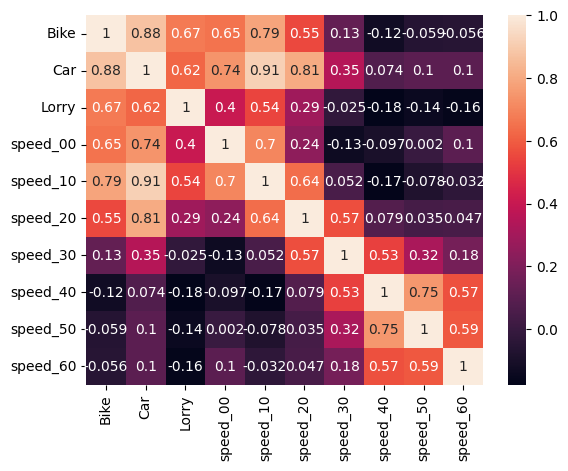

In [ ]:
num_columns = df.select_dtypes(include=['number','float64'])
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

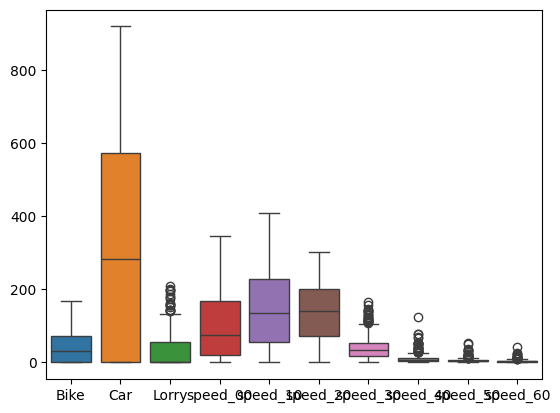

In [ ]:
sns.boxplot(df)
plt.show()

# Data Preprocessing

In [ ]:
miss_val_col = ['speed_00','speed_10','speed_20','speed_30','speed_40','speed_50','speed_60']

for col in miss_val_col:
    df[col].fillna(0, inplace=True)

df.isnull().sum()

,0
Bike,0
Car,0
Lorry,0
speed_00,0
speed_10,0
speed_20,0
speed_30,0
speed_40,0
speed_50,0
speed_60,0


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    for col in df.columns:
     df = remove_outliers(df,df.col)

In [311]:
df.drop_duplicates(inplace=True)

In [312]:
df.duplicated().sum()

0

## Feature Engineering


In [ ]:
df['traffic'] = df['speed_00'] + df['speed_10'] + df['speed_20'] + df['speed_30']

In [ ]:
df.drop(columns=['Bike','Car',
                 'Lorry','speed_00',
                 'speed_10','speed_20',
                 'speed_30','speed_40',
                 'speed_50','speed_60'], inplace=True)

## Plot Data

<Axes: xlabel='Date'>

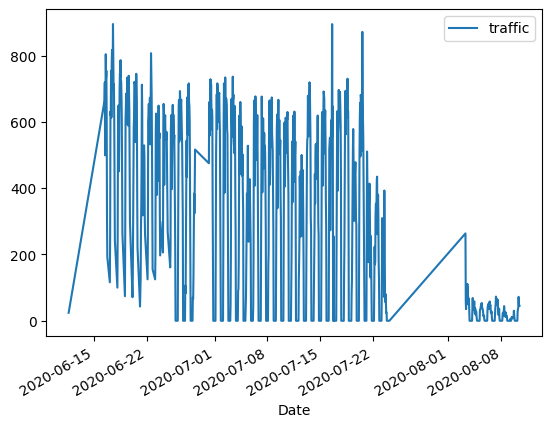

In [ ]:
df.plot()

<Axes: xlabel='Date'>

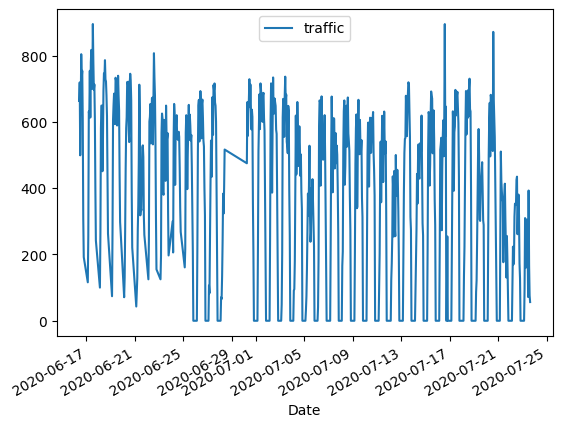

In [ ]:
df.sort_index(inplace=True)
df.drop(index=df[:'2020-06-16 00:00:00+00:00'].index,inplace=True)

df.drop(index=df['2020-07-23 16:00:00+00:00':].index,inplace=True)

df.plot()

## Train-Test Split

In [ ]:
splitindex = int(len(df)*0.7)
splitdate = df.index[splitindex]

train = df.loc[:splitdate]

valindex = int(len(df) * 0.85)
valdate = df.index[valindex]
val = df.loc[splitdate:valdate]

test = df.loc[valdate:]

## Feature Scaling

In [ ]:
sc = MinMaxScaler()

sc.fit(train) # scale for just train
train_scaled = sc.transform(train) # train
val_scaled = sc.transform(val) # val
test_scaled = sc.transform(test) # test

In [ ]:
Window_size = 2

trainxy =timeseries_dataset_from_array(train_scaled, targets = train_scaled[2:], sequence_length =Window_size)
valxy =timeseries_dataset_from_array(val_scaled, targets = val_scaled[2:], sequence_length =Window_size)
testxy =timeseries_dataset_from_array(test_scaled, targets = test_scaled[2:], sequence_length =Window_size)


# Using RNN Model

## Building the RNN Model

In [ ]:
model_RNN = Sequential([SimpleRNN(units=32, activation='tanh', return_sequences=True), # 1st Hidden layer
                        SimpleRNN(units=64, activation='tanh', return_sequences=True),  # 2nd Hidden layer
                        SimpleRNN(units=128, activation='tanh'),  # 3rd Hidden layer
                        Dropout(0.2),
                       Dense(units=1, activation='relu')]) # Output

model_RNN.compile(optimizer='adam', loss='mae', metrics=['mae'] )

In [ ]:
model_RNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, None, 32)            │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, None, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,389 (376.52 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,260 (251.02 KB)

## Fit the RNN Model

In [ ]:
RNN_History = model_RNN.fit(trainxy, validation_data=valxy, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.3293 - mae: 0.3293 - val_loss: 0.1560 - val_mae: 0.1560
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1913 - mae: 0.1913 - val_loss: 0.1490 - val_mae: 0.1490
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1689 - mae: 0.1689 - val_loss: 0.1366 - val_mae: 0.1366
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1556 - mae: 0.1556 - val_loss: 0.1442 - val_mae: 0.1442
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1589 - mae: 0.1589 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1419 - mae: 0.1419 - val_loss: 0.1356 - val_mae: 0.1356
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.1098 - val_mae: 0.1098
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1287 - mae: 0.1287 - val_loss: 0.1150 - val_mae: 0.1150
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1255 - mae: 0.1255 -

## Make preductuion RNN Model

In [ ]:
for b in testxy:
  test_X, test_y = b
  pred_RNN = model_RNN.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


## Make Evaluation RNN Model

In [ ]:
MAE_val = RNN_History.history['val_mae']

final_MAEval = MAE_val[-1]
print(f'The value of MAE for RNN: {final_MAEval:.4f}')

The value of MAE for RNN: 0.1019


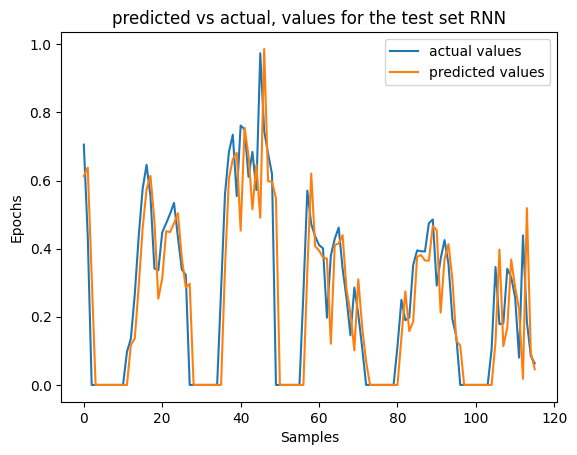

In [ ]:
predits = []
act_val = []

predits.extend(pred_RNN.flatten())
act_val.extend(test_y.numpy().flatten())

plt.plot(act_val, label='actual values')
plt.plot(predits, label='predicted values')
plt.title('predicted vs actual, values for the test set RNN')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Epochs')
plt.show()

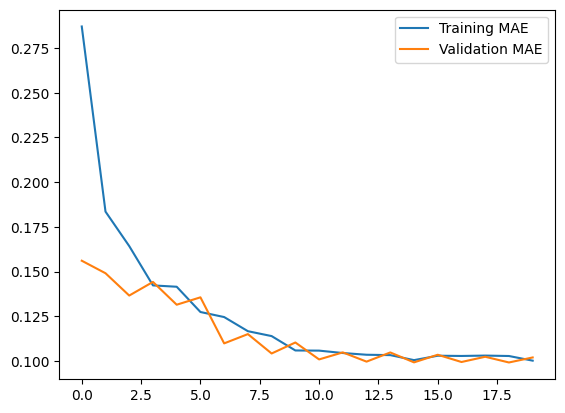

In [ ]:
plt.plot(RNN_History.history['mae'], label='Training MAE')
plt.plot(RNN_History.history['val_mae'], label='Validation MAE')
plt.legend()
plt.show()

# Using LSTM Model

## Building the LSTM Model

In [ ]:
model_LSTM = Sequential([LSTM(units=32, activation='tanh', return_sequences=True), # 1st Hidden layer
                         LSTM(units=64, activation='tanh', return_sequences=True), # 2nd Hidden layer
                         LSTM(units=128, activation='tanh'), # 3ed Hidden layer
                         Dropout(0.2),
                        Dense(units=1, activation='relu')]) # Output

model_LSTM.compile(optimizer='adam', loss='mse', metrics=['mae'] )

In [ ]:
model_LSTM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, None, 32)            │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, None, 64)            │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 384,389 (1.47 MB)

 Trainable params: 128,129 (500.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,260 (1001.02 KB)

## Fit the LSTM Model

In [ ]:
history_LSTM = model_LSTM.fit(trainxy, validation_data=valxy, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 0.2951 - mae: 0.4659 - val_loss: 0.1897 - val_mae: 0.3413
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2487 - mae: 0.4294 - val_loss: 0.1502 - val_mae: 0.3192
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1916 - mae: 0.3794 - val_loss: 0.1061 - val_mae: 0.2865
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1265 - mae: 0.3121 - val_loss: 0.0737 - val_mae: 0.2492
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0727 - mae: 0.2376 - val_loss: 0.0827 - val_mae: 0.2394
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0644 - mae: 0.2074 - val_loss: 0.0894 - val_mae: 0.2410
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0578 - mae: 0.1929 - val_loss: 0.0707 - val_mae: 0.2295
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0515 - mae: 0.1986 - val_loss: 0.0641 - val_mae: 0.2274
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0551 - mae: 0.2097 -

## Make preductuion LSTM Model

In [ ]:
for b in testxy:
  test_X, test_y = b
  pred_LSTM = model_LSTM.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


## Make Evaluation LSTM Model

In [ ]:
MAE_val = history_LSTM.history['val_mae']

final_MAEval = MAE_val[-1]
print(f'The value of MAE for LSTM: {final_MAEval:.4f}')

The value of MAE for LSTM: 0.1562


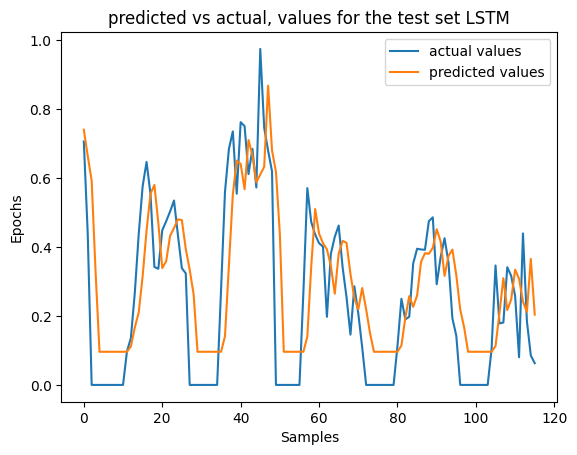

In [ ]:
predits = []
act_val = []

predits.extend(pred_LSTM.flatten())
act_val.extend(test_y.numpy().flatten())

plt.plot(act_val, label='actual values')
plt.plot(predits, label='predicted values')
plt.title('predicted vs actual, values for the test set LSTM')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Epochs')
plt.show()

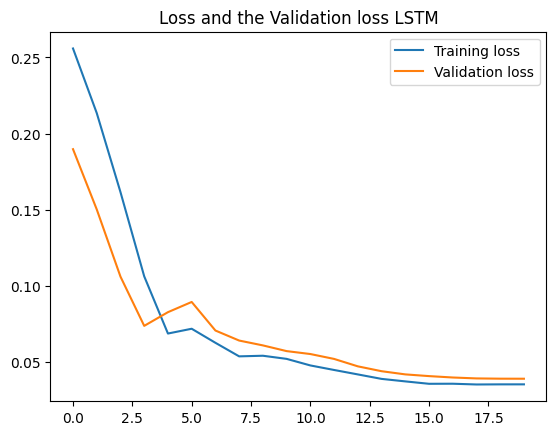

In [ ]:
plt.plot(history_LSTM.history['loss'], label='Training loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss and the Validation loss LSTM')
plt.show()

# Using GRU Model

## Building the GRU Model

In [ ]:
model_GRU = Sequential([GRU(units=32, activation='tanh', return_sequences=True), # 1st Hidden layer
                         GRU(units=64, activation='tanh', return_sequences=True), # 2nd Hidden layer
                         GRU(units=128, activation='tanh'), # 3ed Hidden layer
                         Dropout(0.2),
                       Dense(units=1, activation='relu')]) # Output

model_GRU.compile(optimizer='adam', loss='mse', metrics=['mae'] )

In [ ]:
model_GRU.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, None, 32)            │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, None, 64)            │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 290,405 (1.11 MB)

 Trainable params: 96,801 (378.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 193,604 (756.27 KB)

## fit the GRU model

In [ ]:
history_GRU = model_GRU.fit(trainxy, validation_data=valxy, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 0.2840 - mae: 0.4583 - val_loss: 0.1302 - val_mae: 0.3008
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1533 - mae: 0.3378 - val_loss: 0.0612 - val_mae: 0.2243
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0610 - mae: 0.2132 - val_loss: 0.0850 - val_mae: 0.2321
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0613 - mae: 0.1950 - val_loss: 0.0596 - val_mae: 0.2025
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0413 - mae: 0.1721 - val_loss: 0.0499 - val_mae: 0.1998
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0484 - mae: 0.1937 - val_loss: 0.0464 - val_mae: 0.1912
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0450 - mae: 0.1834 - val_loss: 0.0410 - val_mae: 0.1704
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0360 - mae: 0.1555 - val_loss: 0.0408 - val_mae: 0.1623
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0356 - mae: 0.1510 -

## Make preductuion with Model GRU

In [ ]:
for b in testxy:
  test_X, test_y = b
  pred_GRU = model_GRU.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


## Make Evaluation GRU Model

In [ ]:
MAE_val = history_GRU.history['val_mae']

final_MAEval = MAE_val[-1]
print(f'The value of MAE for GRU: {final_MAEval:.4f}')

The value of MAE for GRU: 0.1420


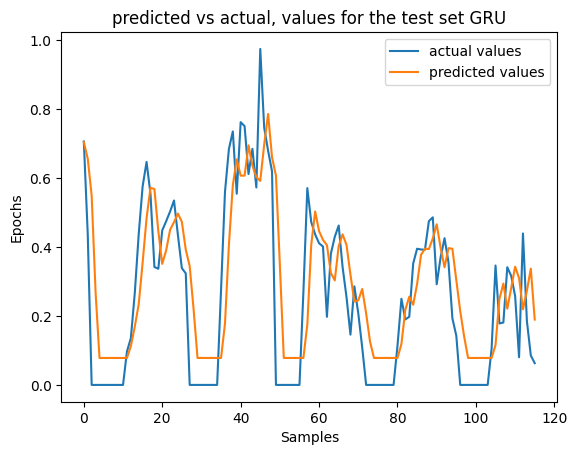

In [ ]:
predits = []
act_val = []

predits.extend(pred_GRU.flatten())
act_val.extend(test_y.numpy().flatten())

plt.plot(act_val, label='actual values')
plt.plot(predits, label='predicted values')
plt.title('predicted vs actual, values for the test set GRU')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Epochs')
plt.show()

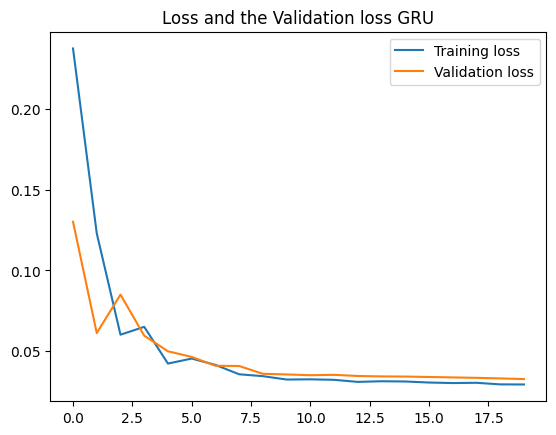

In [ ]:
plt.plot(history_GRU.history['loss'], label='Training loss')
plt.plot(history_GRU.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss and the Validation loss GRU')
plt.show()